In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

#### Type of trial: intervention (drug, procedure etc.)

In [22]:
## Function that gets the intervention
def get_interventions(df):
    cleaned_data = []

    # Iterate over each row in the original dataframe
    for index, row in df.iterrows():
        interventions = row['Interventions'].split('|')


        # Iterate over each intervention
        for intervention in interventions:
            type_name = intervention.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()

            # Append the cleaned data to the new dataframe
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)

    return cleaned_df

breast_cancer_intervention_df = get_interventions(breast_cancer_df)
covid_intervention_df = get_interventions(covid_df)

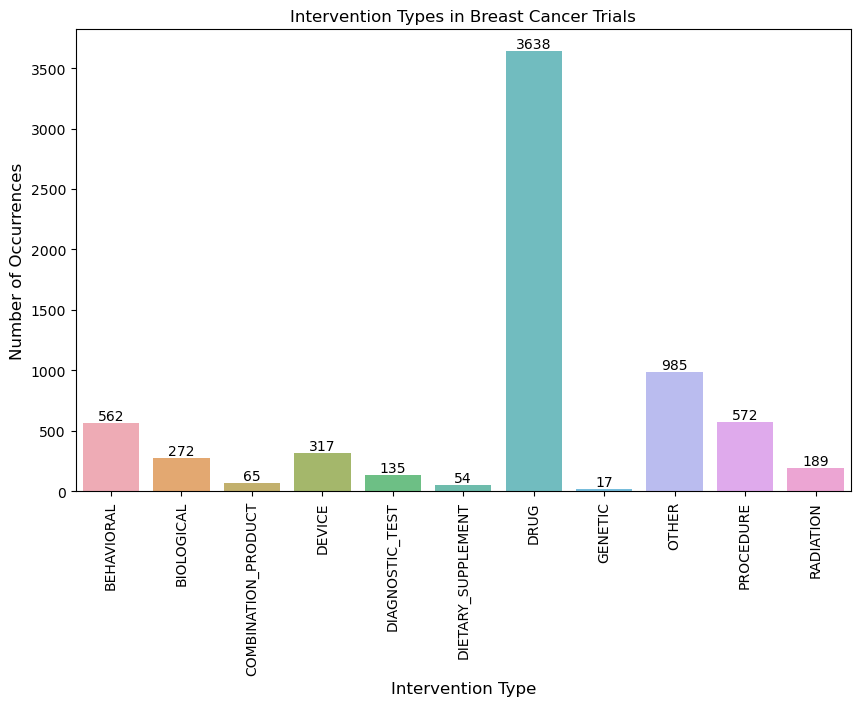

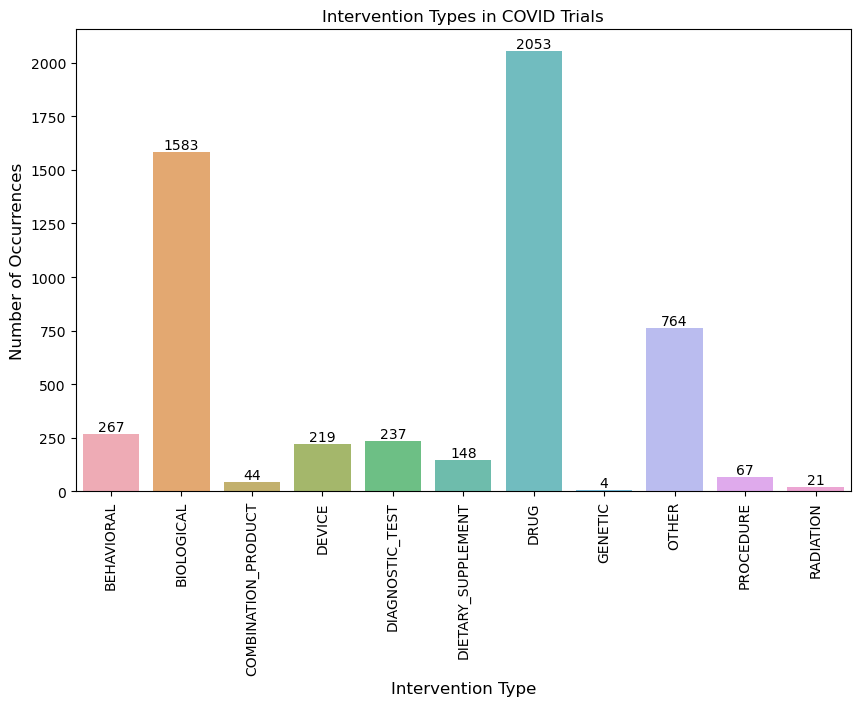

In [23]:
## Bar plot ##

def plot_intervention_types(df, title):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()


plot_intervention_types(breast_cancer_intervention_df, 'Intervention Types in Breast Cancer Trials')

plot_intervention_types(covid_intervention_df, 'Intervention Types in COVID Trials')

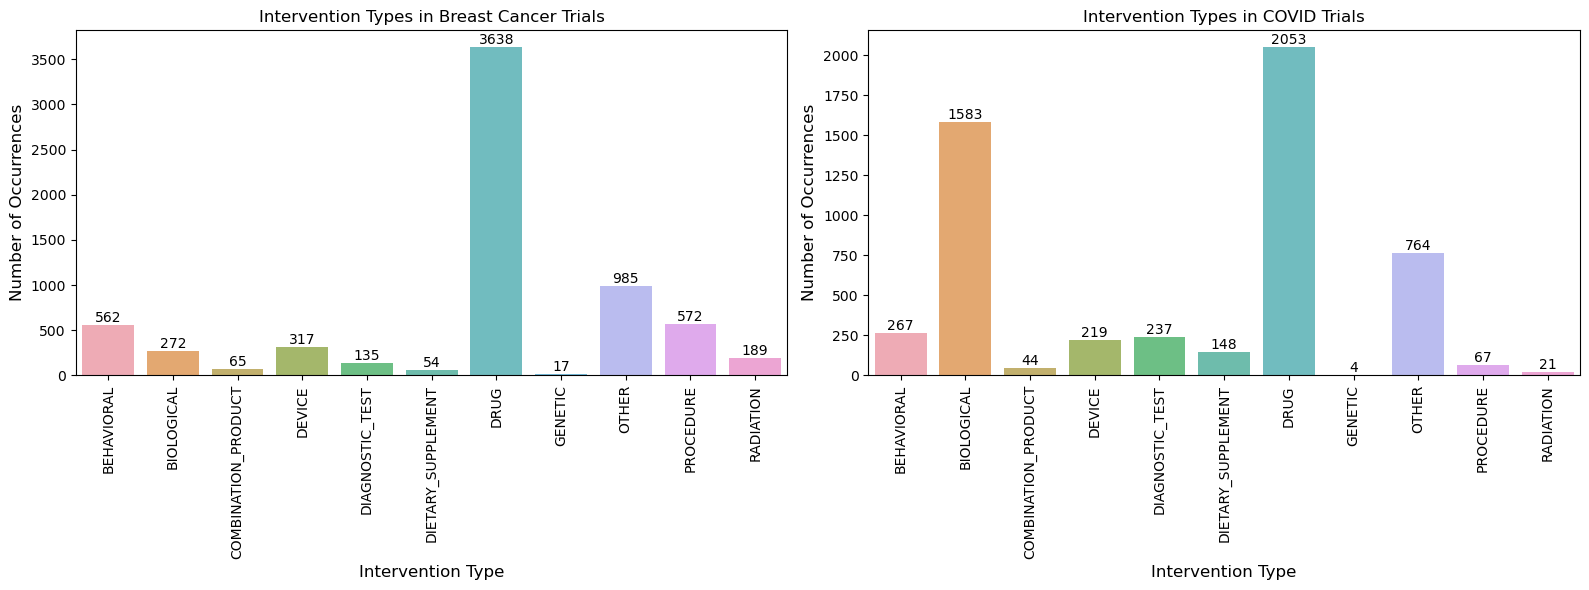

DRUG                   3638
OTHER                   985
PROCEDURE               572
BEHAVIORAL              562
DEVICE                  317
BIOLOGICAL              272
RADIATION               189
DIAGNOSTIC_TEST         135
COMBINATION_PRODUCT      65
DIETARY_SUPPLEMENT       54
GENETIC                  17
Name: Type, dtype: int64
DRUG                   2053
BIOLOGICAL             1583
OTHER                   764
BEHAVIORAL              267
DIAGNOSTIC_TEST         237
DEVICE                  219
DIETARY_SUPPLEMENT      148
PROCEDURE                67
COMBINATION_PRODUCT      44
RADIATION                21
GENETIC                   4
Name: Type, dtype: int64


In [24]:
def plot_intervention_types(df, title, ax):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8, ax=ax)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        ax.text(i, value, value, ha='center', va='bottom')

    ax.set_title(title)
    ax.set_ylabel('Number of Occurrences', fontsize=12)
    ax.set_xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    ax.tick_params(axis='x', rotation=90)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for breast cancer
plot_intervention_types(breast_cancer_intervention_df, 'Intervention Types in Breast Cancer Trials', axes[0])

# Plot for COVID
plot_intervention_types(covid_intervention_df, 'Intervention Types in COVID Trials', axes[1])

plt.tight_layout()
plt.show()

## Print count of each intervention type to console
print(breast_cancer_intervention_df['Type'].value_counts())
print(covid_intervention_df['Type'].value_counts())

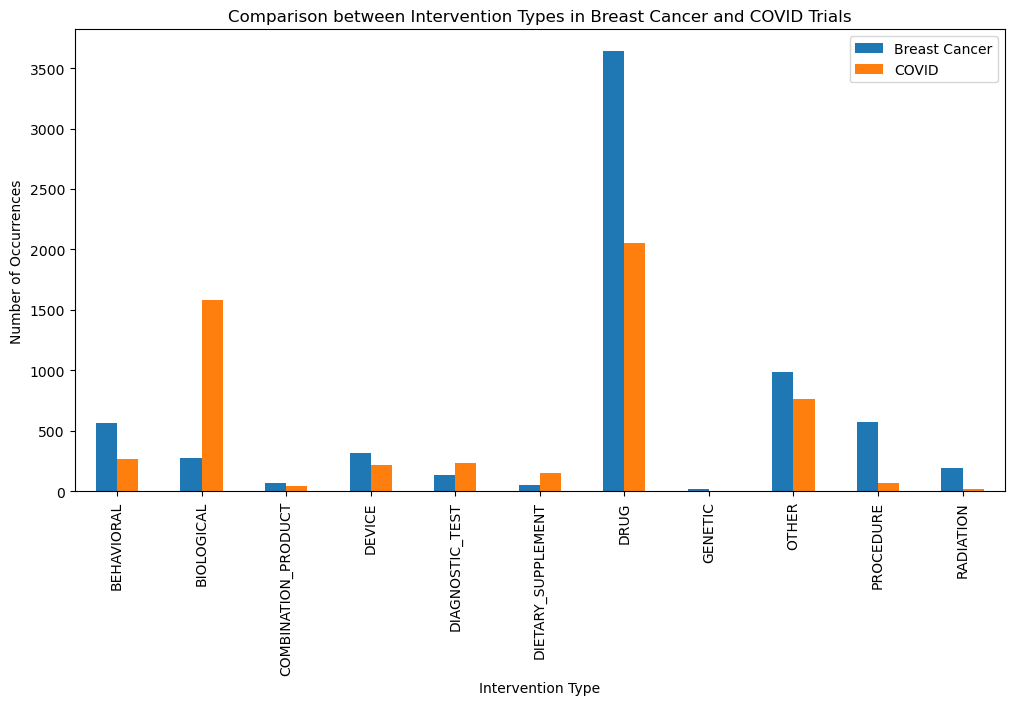

In [25]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_interventionType_counts = breast_cancer_intervention_df['Type'].value_counts()
covid_counts_interventionType_counts = covid_intervention_df['Type'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_interventionType_counts, 'COVID': covid_counts_interventionType_counts})

# df = df.sort_values(by='Breast Cancer', ascending=False)
# sort alphabetically
df = df.sort_index()

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Intervention Types in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Intervention Type')

plt.show()

#### Activity status: inactive, etc.

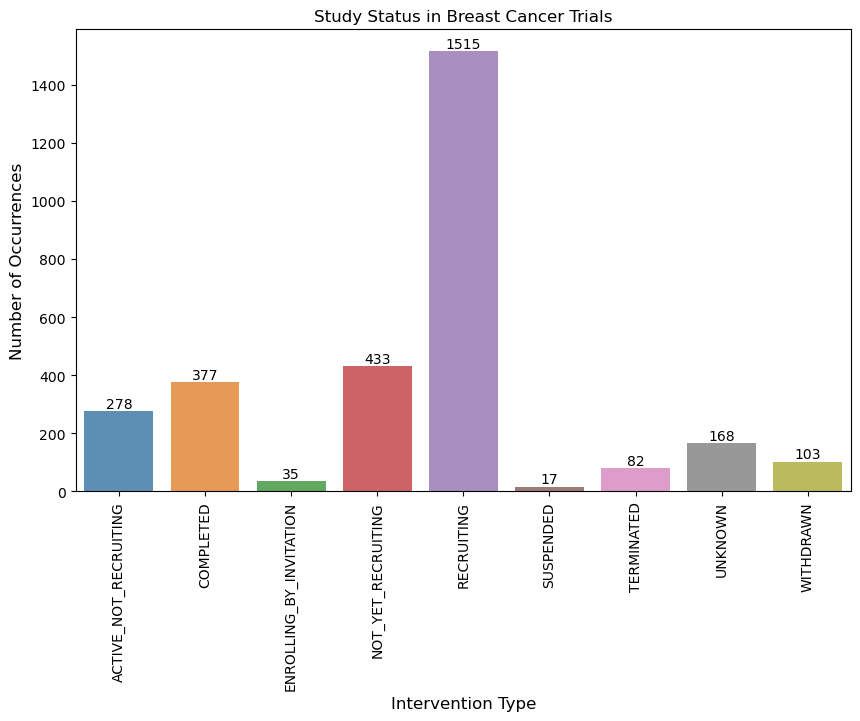

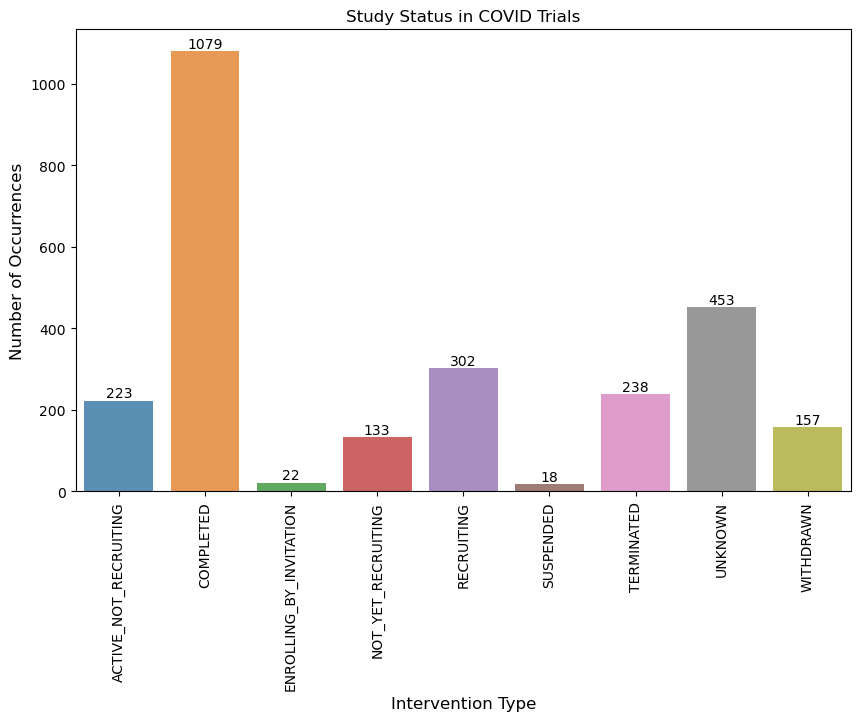

In [26]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,

def bar_plot(df, title):
    # Count the frequency of each intervention type
    type_counts = df.value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()

bar_plot(breast_cancer_df['Study Status'], 'Study Status in Breast Cancer Trials')
bar_plot(covid_df['Study Status'], 'Study Status in COVID Trials')

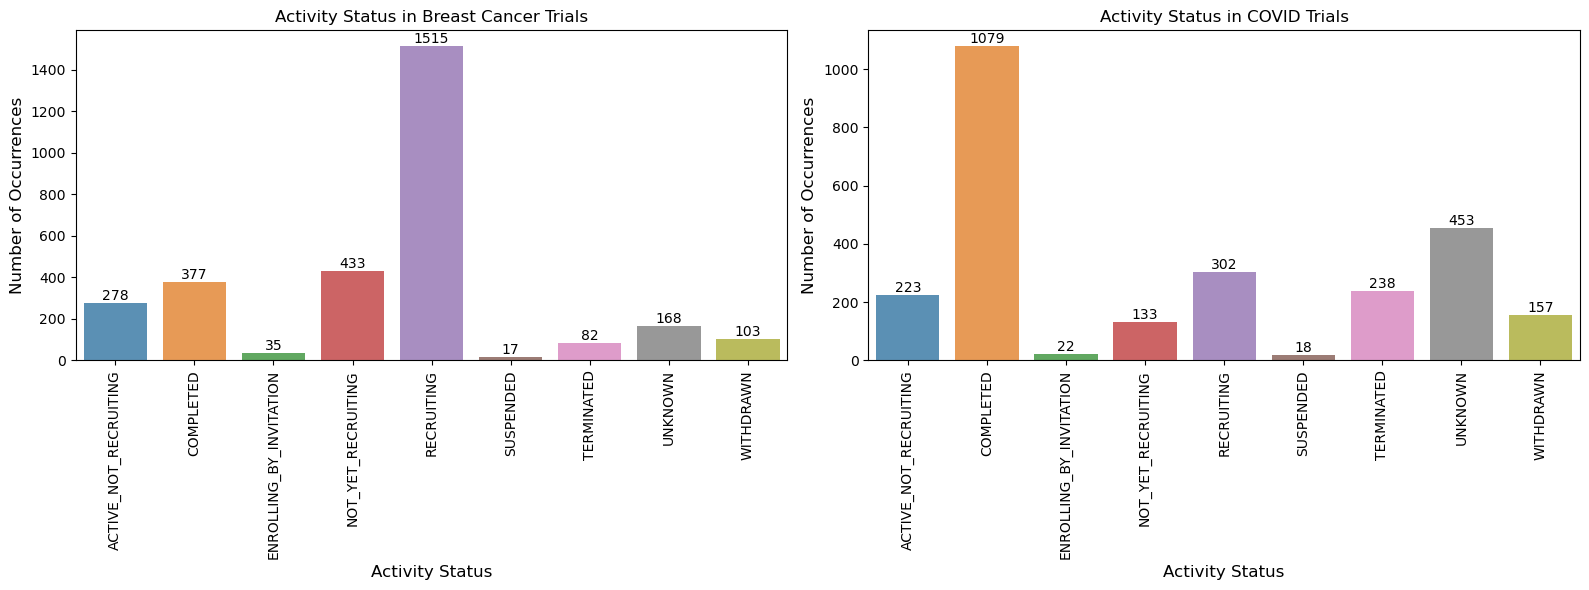

RECRUITING                 1515
NOT_YET_RECRUITING          433
COMPLETED                   377
ACTIVE_NOT_RECRUITING       278
UNKNOWN                     168
WITHDRAWN                   103
TERMINATED                   82
ENROLLING_BY_INVITATION      35
SUSPENDED                    17
Name: Study Status, dtype: int64
COMPLETED                  1079
UNKNOWN                     453
RECRUITING                  302
TERMINATED                  238
ACTIVE_NOT_RECRUITING       223
WITHDRAWN                   157
NOT_YET_RECRUITING          133
ENROLLING_BY_INVITATION      22
SUSPENDED                    18
Name: Study Status, dtype: int64


In [27]:
def bar_plot(df, title, ax):
    # Count the frequency of each intervention type
    type_counts = df.value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8, ax=ax)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        ax.text(i, value, value, ha='center', va='bottom')

    ax.set_title(title)
    ax.set_ylabel('Number of Occurrences', fontsize=12)
    ax.set_xlabel('Activity Status', fontsize=12)

    # Rotate x labels for better visibility
    ax.tick_params(axis='x', rotation=90)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for breast cancer
bar_plot(breast_cancer_df['Study Status'], 'Activity Status in Breast Cancer Trials', axes[0])

# Plot for COVID
bar_plot(covid_df['Study Status'], 'Activity Status in COVID Trials', axes[1])

plt.tight_layout()
plt.show()

# print each activity status type and their frequency in console
print(breast_cancer_df['Study Status'].value_counts())
print(covid_df['Study Status'].value_counts())


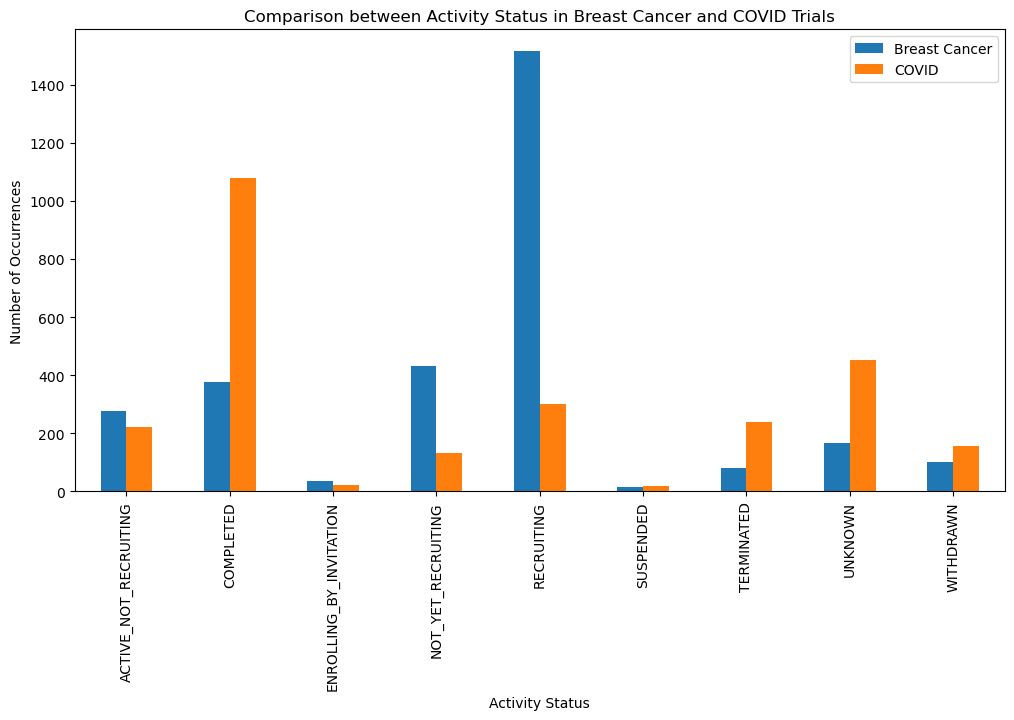

In [28]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_studyStatus_counts = breast_cancer_df['Study Status'].value_counts()
covid_counts_studyStatus_counts = covid_df['Study Status'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_studyStatus_counts, 'COVID': covid_counts_studyStatus_counts})

# df = df.sort_values(by='Breast Cancer', ascending=False)
# sort alphabetically
df = df.sort_index()

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Activity Status in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Activity Status')

plt.show()

In [29]:
## Get the 15 most studied drugs that appeared in trials of each disease ##

# Get Type == DRUG from breast_cancer_intervention_df
breast_cancer_drugs = breast_cancer_intervention_df.loc[breast_cancer_intervention_df['Type'] == 'DRUG']
breast_cancer_drugs = breast_cancer_drugs['Name'].str.split(',', expand=True)
breast_cancer_drugs_series = breast_cancer_drugs.stack()

top_breast_cancer_drug_counts = breast_cancer_drugs_series.value_counts().head(15)
print(top_breast_cancer_drug_counts)

# Do the same for covid
covid_drugs = covid_intervention_df.loc[covid_intervention_df['Type'] == 'DRUG']
covid_drugs = covid_drugs['Name'].str.split(',', expand=True)
covid_drugs_series = covid_drugs.stack()

top_covid_drug_counts = covid_drugs_series.value_counts().head(15)
print(top_covid_drug_counts)


Fulvestrant         84
Paclitaxel          71
Cyclophosphamide    68
Trastuzumab         65
Pembrolizumab       59
Carboplatin         59
Capecitabine        53
Abemaciclib         53
Placebo             51
Letrozole           45
Pertuzumab          44
Palbociclib         41
Docetaxel           39
Tamoxifen           34
Olaparib            31
dtype: int64
Placebo                       269
Hydroxychloroquine             65
Ivermectin                     26
Azithromycin                   25
Remdesivir                     22
Placebo oral tablet            21
Favipiravir                    19
Tocilizumab                    14
Standard of care               14
Methylprednisolone             13
Enoxaparin                     12
Dexamethasone                  11
Nitazoxanide                   11
Hydroxychloroquine Sulfate     10
PF-07321332/ritonavir          10
dtype: int64


In [46]:
covid_intervention_df
breast_cancer_intervention_df

# Split the 'Name' column into multiple rows
df = breast_cancer_intervention_df.assign(Name=breast_cancer_intervention_df['Name'].str.split(',')).explode('Name')
intervention_counts = df.groupby('trial_id').size()
average_interventions = intervention_counts.mean()
print(f"The average number of interventions in each trial is: {average_interventions}")

intervention_summary = intervention_counts.describe().loc[['mean', 'min', 'max', '50%']]
# use tabulate to create table
# round mean to second decimal point
intervention_summary['mean'] = round(intervention_summary['mean'], 2)
head = ["Stats", "Value"]
print(tabulate(intervention_summary.to_frame(), headers=head, tablefmt='pretty'))



# Find common intervention type pair or groups
intervention_pairs = df.groupby('trial_id')['Type'].apply(lambda x: list(x)).reset_index()
intervention_pairs['Type'] = intervention_pairs['Type'].apply(lambda x: sorted(x))
intervention_pairs = intervention_pairs['Type'].value_counts()
intervention_pairs = intervention_pairs.reset_index()
intervention_pairs.columns = ['Type', 'Count']
intervention_pairs = intervention_pairs.sort_values(by='Count', ascending=False)
# print(intervention_pairs.head(10))
# use tabulate to create table
head = ["Type Groups for Breast Cancer", "Count"]
print(tabulate(intervention_pairs.head(10), headers=head, tablefmt='pretty'))


The average number of interventions in each trial is: 2.340093085106383
+-------+-------+
| Stats | Value |
+-------+-------+
| mean  | 2.34  |
|  min  |  1.0  |
|  max  | 56.0  |
|  50%  |  2.0  |
+-------+-------+
+---+----------------------------------+-------+
|   |  Type Groups for Breast Cancer   | Count |
+---+----------------------------------+-------+
| 0 |             ['DRUG']             |  467  |
| 1 |         ['DRUG', 'DRUG']         |  378  |
| 2 |            ['OTHER']             |  196  |
| 3 |     ['DRUG', 'DRUG', 'DRUG']     |  166  |
| 4 |          ['BEHAVIORAL']          |  162  |
| 5 |            ['DEVICE']            |  148  |
| 6 |        ['OTHER', 'OTHER']        |  106  |
| 7 |   ['BEHAVIORAL', 'BEHAVIORAL']   |  99   |
| 8 | ['DRUG', 'DRUG', 'DRUG', 'DRUG'] |  97   |
| 9 |          ['PROCEDURE']           |  90   |
+---+----------------------------------+-------+


In [47]:
covid_intervention_df
breast_cancer_intervention_df

# Split the 'Name' column into multiple rows
df = covid_intervention_df.assign(Name=covid_intervention_df['Name'].str.split(',')).explode('Name')
intervention_counts = df.groupby('trial_id').size()
average_interventions = intervention_counts.mean()
print(f"The average number of interventions in each trial is: {average_interventions}")

intervention_summary = intervention_counts.describe().loc[['mean', 'min', 'max', '50%']]
# use tabulate to create table
# round mean to second decimal point
intervention_summary['mean'] = round(intervention_summary['mean'], 2)
head = ["Stats", "Value"]
print(tabulate(intervention_summary.to_frame(), headers=head, tablefmt='pretty'))



# Find common intervention type pair or groups
intervention_pairs = df.groupby('trial_id')['Type'].apply(lambda x: list(x)).reset_index()
intervention_pairs['Type'] = intervention_pairs['Type'].apply(lambda x: sorted(x))
intervention_pairs = intervention_pairs['Type'].value_counts()
intervention_pairs = intervention_pairs.reset_index()
intervention_pairs.columns = ['Type', 'Count']
intervention_pairs = intervention_pairs.sort_values(by='Count', ascending=False)
# print(intervention_pairs.head(10))
# use tabulate to create table
head = ["Type Groups for Covid-19", "Count"]
print(tabulate(intervention_pairs.head(10), headers=head, tablefmt='pretty'))


The average number of interventions in each trial is: 2.1325714285714286
+-------+-------+
| Stats | Value |
+-------+-------+
| mean  | 2.13  |
|  min  |  1.0  |
|  max  | 56.0  |
|  50%  |  2.0  |
+-------+-------+
+---+------------------------------+-------+
|   |   Type Groups for Covid-19   | Count |
+---+------------------------------+-------+
| 0 |       ['DRUG', 'DRUG']       |  385  |
| 1 |           ['DRUG']           |  287  |
| 2 |        ['BIOLOGICAL']        |  218  |
| 3 | ['BIOLOGICAL', 'BIOLOGICAL'] |  200  |
| 4 |          ['OTHER']           |  153  |
| 5 |      ['DRUG', 'OTHER']       |  117  |
| 6 |   ['BIOLOGICAL', 'OTHER']    |  96   |
| 7 |     ['DIAGNOSTIC_TEST']      |  94   |
| 8 |        ['BEHAVIORAL']        |  88   |
| 9 |          ['DEVICE']          |  86   |
+---+------------------------------+-------+


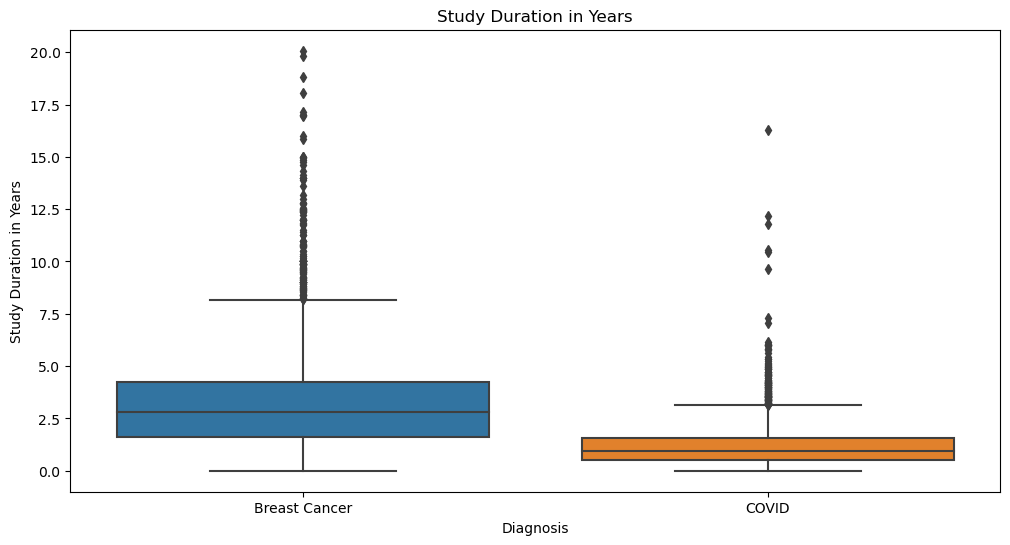

+-------+--------------------+--------------------+
|       |       Stats        |       Value        |
+-------+--------------------+--------------------+
| count |       3008.0       |       2625.0       |
| mean  | 3.2684840425531916 | 1.2097066666666665 |
|  std  | 2.473242217398895  | 1.091708613108353  |
|  min  |        0.0         |        0.0         |
|  25%  |        1.59        |        0.5         |
|  50%  |       2.825        |        0.96        |
|  75%  |       4.2225       |        1.56        |
|  max  |       20.07        |       16.28        |
+-------+--------------------+--------------------+


In [52]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,

# breast_cancer_df['Primary Completion Date'].unique()
# # Count NAs in breast_cancer_df['Primary Completion Date']
# breast_cancer_df['Primary Completion Date'].isna().sum()

# # Do the same thing for Completion Date,First Posted,Results First Posted,Last Update Posted,
# print(breast_cancer_df['Completion Date'].isna().sum())
# print(breast_cancer_df['First Posted'].isna().sum())
# print(breast_cancer_df['Results First Posted'].unique())
# print(breast_cancer_df['Start Date'].isna().sum())


## Get duration
breast_cancer_df['Start Date'] = pd.to_datetime(breast_cancer_df['Start Date'])
breast_cancer_df['Completion Date'] = pd.to_datetime(breast_cancer_df['Completion Date'])
breast_cancer_df['Study Duration'] = breast_cancer_df['Completion Date'] - breast_cancer_df['Start Date']
breast_cancer_df['Study Duration Days'] = breast_cancer_df['Study Duration'].dt.days
breast_cancer_df['Study Duration Days'].mean()
breast_cancer_df['Study Duration Years'] = breast_cancer_df['Study Duration Days'] / 365.25
breast_cancer_df['Study Duration Years'] = breast_cancer_df['Study Duration Years'].round(2)
breast_cancer_df['Study Duration Years'].mean().round(2)

## Do the same thing with Covid
covid_df['Start Date'] = pd.to_datetime(covid_df['Start Date'])
covid_df['Completion Date'] = pd.to_datetime(covid_df['Completion Date'])
covid_df['Study Duration'] = covid_df['Completion Date'] - covid_df['Start Date']
covid_df['Study Duration Days'] = covid_df['Study Duration'].dt.days
covid_df['Study Duration Days'].mean()
covid_df['Study Duration Years'] = covid_df['Study Duration Days'] / 365.25
covid_df['Study Duration Years'] = covid_df['Study Duration Years'].round(2)
covid_df['Study Duration Years'].mean().round(2)

# box plot of breast cancer and covid study duration
plt.figure(figsize=(12, 6))
sns.boxplot(data=[breast_cancer_df['Study Duration Years'], covid_df['Study Duration Years']])
plt.title('Study Duration in Years')
plt.ylabel('Study Duration in Years')
plt.xlabel('Diagnosis')
plt.xticks([0, 1], ['Breast Cancer', 'COVID'])
plt.show()

# summary statistics of the study duration of mean, max, min, and median using tabulate
study_duration_summary = pd.DataFrame({'Breast Cancer': breast_cancer_df['Study Duration Years'].describe(), 'COVID': covid_df['Study Duration Years'].describe()})
head = ["Stats", "Value"]
print(tabulate(study_duration_summary, headers=head, tablefmt='pretty'))


In [ ]:
# Create summary statistics for breast cancer and covid study duration
print(breast_cancer_df['Study Duration Years'].describe())

print(covid_df['Study Duration Years'].describe())

count    3008.000000
mean        3.268484
std         2.473242
min         0.000000
25%         1.590000
50%         2.825000
75%         4.222500
max        20.070000
Name: Study Duration Years, dtype: float64
count    2625.000000
mean        1.209707
std         1.091709
min         0.000000
25%         0.500000
50%         0.960000
75%         1.560000
max        16.280000
Name: Study Duration Years, dtype: float64


Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents', 'Study Duration', 'Study Duration Days',
       'Study Duration Years'],
      dtype='object')


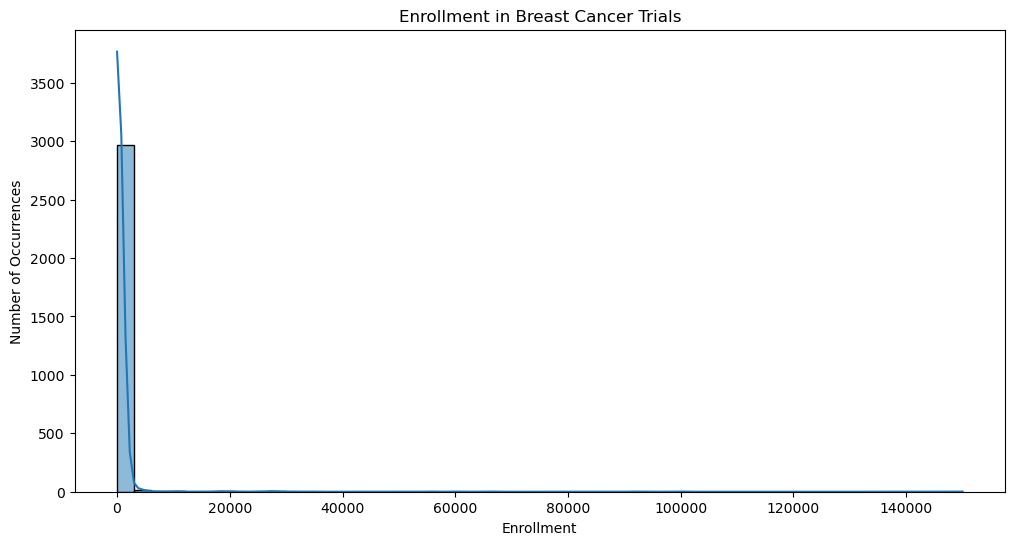

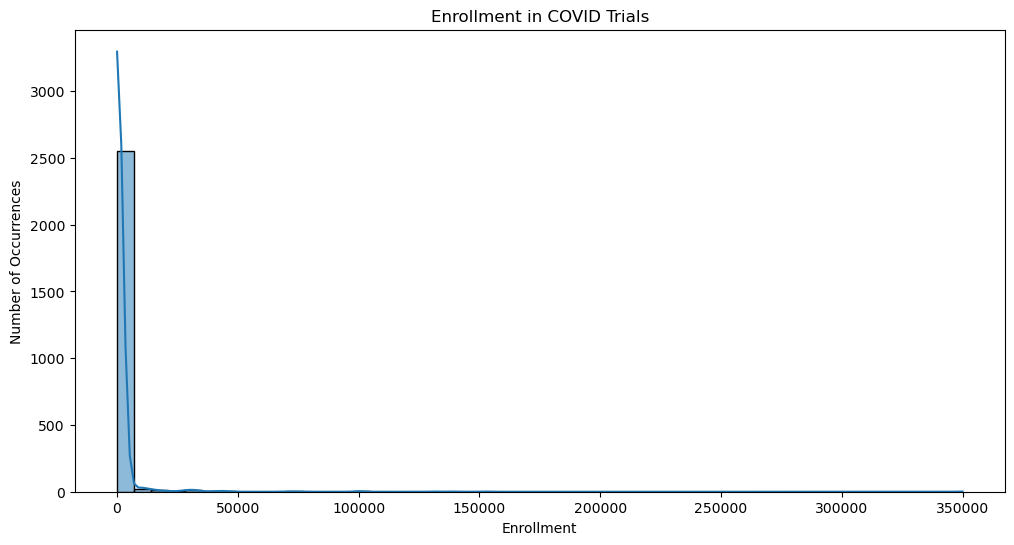

In [ ]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,
print(breast_cancer_df.columns)
breast_cancer_df['Enrollment'].unique()

# Create a histogram of just breast cancer enrollment
plt.figure(figsize=(12, 6))
sns.histplot(breast_cancer_df['Enrollment'], bins=50, kde=True)
plt.title('Enrollment in Breast Cancer Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Enrollment')
plt.show()

# Do the same for just covid
plt.figure(figsize=(12, 6))
sns.histplot(covid_df['Enrollment'], bins=50, kde=True)
plt.title('Enrollment in COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Enrollment')
plt.show()